# Import necessary libraries

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.impute import SimpleImputer

# Load your dataset

In [146]:
df =pd.read_csv('weather_data.csv') 

# Basic data exploration and cleaning

In [147]:
print(df.head())
df.info()
df.isnull().sum()

       STATION                 NAME        DATE  PRCP  TAVG  TMAX  TMIN
0  IN022023000  NEW DELHI PALAM, IN  1970-01-01   0.0   NaN   NaN   NaN
1  IN022023000  NEW DELHI PALAM, IN  1970-01-02   0.0   NaN   NaN   NaN
2  IN022023000  NEW DELHI PALAM, IN  1970-01-03   0.0   NaN   NaN   NaN
3  IN022023000  NEW DELHI PALAM, IN  1970-01-04   0.0   NaN   NaN   NaN
4  IN022023000  NEW DELHI PALAM, IN  1970-01-05   0.0   NaN   NaN   NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10538 entries, 0 to 10537
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  10538 non-null  object 
 1   NAME     10538 non-null  object 
 2   DATE     10538 non-null  object 
 3   PRCP     1409 non-null   float64
 4   TAVG     10173 non-null  float64
 5   TMAX     2402 non-null   float64
 6   TMIN     1996 non-null   float64
dtypes: float64(4), object(3)
memory usage: 576.4+ KB


STATION       0
NAME          0
DATE          0
PRCP       9129
TAVG        365
TMAX       8136
TMIN       8542
dtype: int64

# Data visualization - Temperature and Humidity distribution

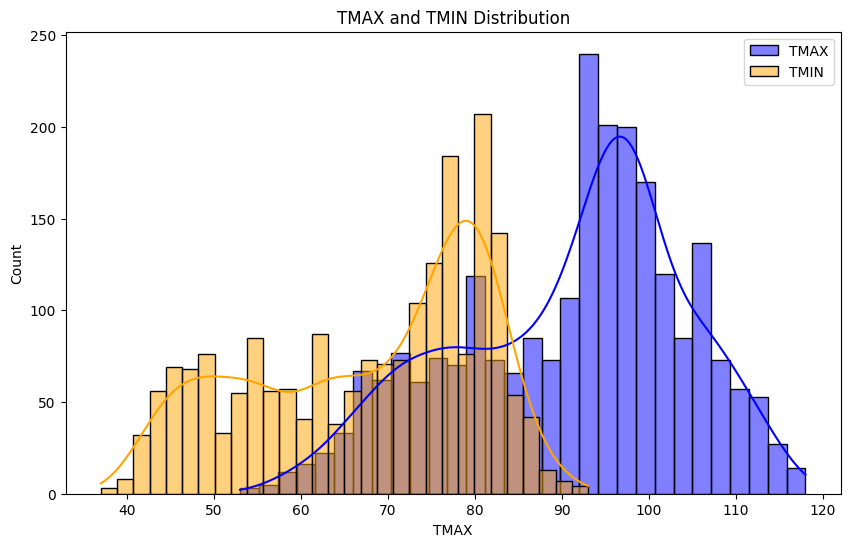

In [148]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TMAX'], kde=True, color='blue', bins=30, label='TMAX')
sns.histplot(df['TMIN'], kde=True, color='orange', bins=30, label='TMIN')
plt.title('TMAX and TMIN Distribution')
plt.legend()
plt.show()

# Preprocess the data

In [149]:
features = ['TMAX', 'TMIN']  # Using TMAX and TMIN as features
X = df[features]
y = df['TAVG']  # Target variable

In [150]:
# Handle missing values in features (X)
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# Train-test split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
# Check for missing values in the target variable
print(y_train.isnull().sum())

289


In [153]:
# Handling missing values in y_train and y_test
y_train = y_train.fillna(y_train.median())  # Fill NaN in y_train
y_test = y_test.fillna(y_test.median())    # Fill NaN in y_test

# Standardizing the data

In [154]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model 1: Decision Tree Regressor

In [155]:
# Model 1: Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Check if dt_predictions contains NaN values
if np.isnan(dt_predictions).any():
    dt_predictions = np.nan_to_num(dt_predictions)

# Evaluation for Decision Tree
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

print(f"Decision Tree Regressor - MSE: {dt_mse}, MAE: {dt_mae}, R2: {dt_r2}")

Decision Tree Regressor - MSE: 129.28202448874157, MAE: 8.733301275033709, R2: 0.2525300938843599


# Model 2: Random Forest Regressor

In [156]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluation for Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Regressor - MSE: {rf_mse}, MAE: {rf_mae}, R2: {rf_r2}")

Random Regressor - MSE: 129.22183287454098, MAE: 8.726899638914023, R2: 0.25287810375188324


# Model 3: Support Vector Regressor

In [157]:
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)

# Evaluation for Support Vector Regressor
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_mae = mean_absolute_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)
print(f"Support Vector Regressor - MSE: {svr_mse}, MAE: {svr_mae}, R2: {svr_r2}")


Support Vector Regressor - MSE: 139.01380307823825, MAE: 8.31704635748076, R2: 0.19626386772186077


# Model 4: Neural Network

In [158]:
nn_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
nn_model.compile(optimizer='adam', loss='mse')
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
nn_predictions = nn_model.predict(X_test).flatten()

# Evaluation for Neural Network
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

c:\python3.11.4\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step


# Results

In [159]:
results = {
    "Model": ["Decision Tree", "Random Forest", "SVR", "Neural Network"],
    "MSE": [dt_mse, rf_mse, svr_mse, nn_mse],
    "MAE": [dt_mae, rf_mae, svr_mae, nn_mae],
    "R2 Score": [dt_r2, rf_r2, svr_r2, nn_r2]
}


In [160]:
# Displaying the results
results_df = pd.DataFrame(results)
results_df

,Model,MSE,MAE,R2 Score
0,Decision Tree,129.282024,8.733301,0.252530
1,Random Forest,129.221833,8.726900,0.252878
2,SVR,139.013803,8.317046,0.196264
3,Neural Network,132.906371,8.766936,0.231575


# Calculating precision, recall, and F1-score

In [167]:
precision = precision_score(binary_actuals, binary_predictions)
recall = recall_score(binary_actuals, binary_predictions)
f1 = f1_score(binary_actuals, binary_predictions)
print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

Precision: 1.0, Recall: 1.0, F1-Score: 1.0


# Data visualization - Predicted vs Actual TAVG

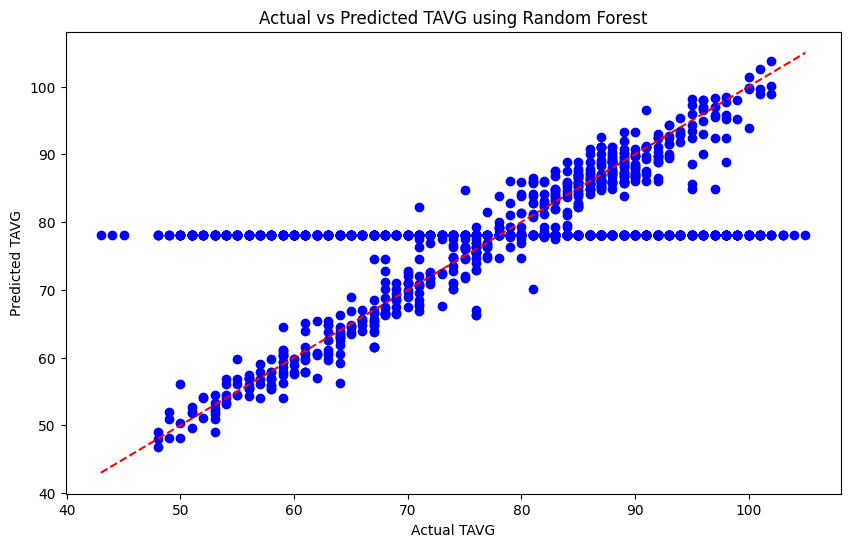

In [162]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual TAVG')
plt.ylabel('Predicted TAVG')
plt.title('Actual vs Predicted TAVG using Random Forest')
plt.show()

# Additional visualization - Pairplot of features

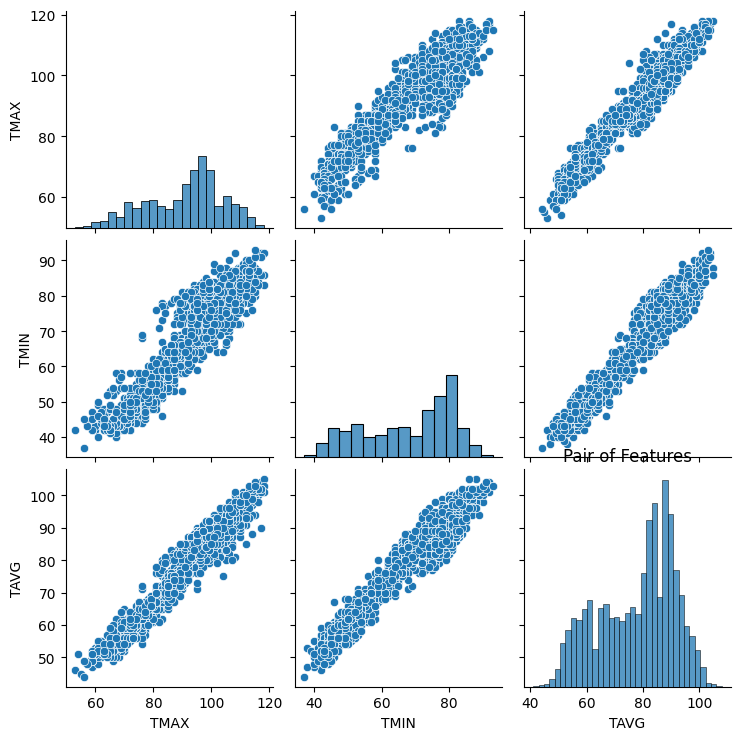

In [163]:
sns.pairplot(df[features + ['TAVG']])
plt.title('Pair of Features')
plt.show()

# Visualization: Line chart for temperature trends over time

In [164]:
weather_df = pd.read_csv("weather_data.csv", index_col="DATE")

<Figure size 1000x600 with 0 Axes>

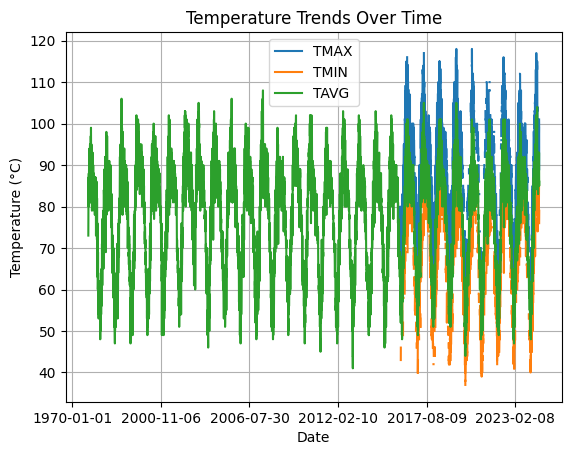

In [165]:
plt.figure(figsize=(10, 6))
weather_df[['TMAX', 'TMIN', 'TAVG']].plot(title='Temperature Trends Over Time')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

# Visualization: Heatmap of temperature correlations

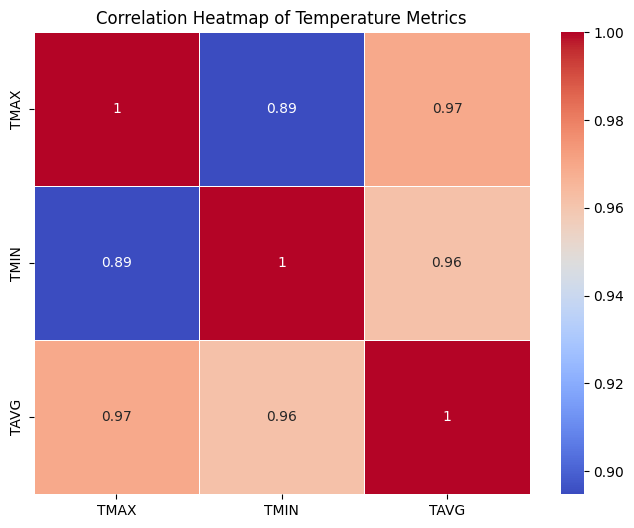

In [166]:
plt.figure(figsize=(8, 6))
sns.heatmap(weather_df[['TMAX', 'TMIN', 'TAVG']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Temperature Metrics')
plt.show()